# Sistema de línea de espera con un servidor (G/G/1)

Jhonathan Mejia-160003525
### Taller 5:
Implementar en Notebook Jupyter una Sistema de línea de espera con un servidor (Modelo de colas G/G/1)

Tiempo de simulación: 16.743876960682083
Tiempo de servicio despues del cierre: 6.743876960682083
Tiempo medio del sistema: 3.7808985742459247
Tiempo medio de la cola: 3.316259222097028

Máximo número de clientes en el sistema: 13


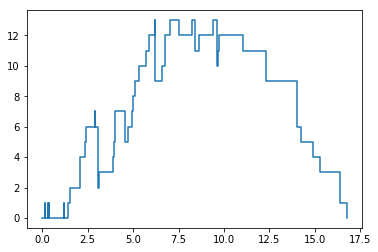

In [11]:
import random
import math
import matplotlib.pyplot as plt

def numeroAleatorio():
    return random.random()

def exponencial(lambda_parm):
    aleatorio = numeroAleatorio()
    valor = - (math.log(1 - aleatorio) / float(lambda_parm))
    return valor

def get_normal():
    aleatorio = numeroAleatorio()
    raiz = math.sqrt(-2 * math.log1p(aleatorio - 1))
    sin = math.sin(2 * math.pi * aleatorio)
    valor = raiz * sin
    if(valor < 0):
        valor = 0
    return valor

def llegada(tiempo_actual_simulado):
    global tiempo
    global numero_de_clientes
    global numero_de_llegadas
    global llegadas
    global lambda_parm
    global tiempo_max_servicio
    global mayor_tiempo
    global clientes, tiempos    
    
    tiempo = tiempo_actual_simulado    
    clientes.append(numero_de_clientes)
    tiempos.append(tiempo)    
    numero_de_clientes += 1
    numero_de_llegadas += 1
    llegadas.append(tiempo)    
    clientes.append(numero_de_clientes)
    tiempos.append(tiempo)    
    nuevo_tiempo_simulado = exponencial(lambda_parm)
    if(tiempo + nuevo_tiempo_simulado < tiempo_max_servicio):
        mayor_tiempo['tiempo_llegadas'] = tiempo + nuevo_tiempo_simulado
    if(numero_de_clientes == 1):
        tiempo_servicio_simulado = get_normal()
        mayor_tiempo['tiempo_salida'] = tiempo + tiempo_servicio_simulado
        tiempo_servicio.append(tiempo_servicio_simulado)
        

def servidor(tiempo_actual_simulado):
    global tiempo
    global numero_de_clientes
    global numero_de_salidas
    global salidas
    global mayor_tiempo
    global clientes, tiempos

    tiempo = tiempo_actual_simulado
    clientes.append(numero_de_clientes)
    tiempos.append(tiempo)
    numero_de_clientes -= 1
    numero_de_salidas += 1
    salidas.append(tiempo)
    clientes.append(numero_de_clientes)
    tiempos.append(tiempo)    
    if(numero_de_clientes > 0):
        tiempo_servicio_simulado = get_normal()
        mayor_tiempo['tiempo_salida'] = tiempo + tiempo_servicio_simulado
        tiempo_servicio.append(tiempo_servicio_simulado)

tiempo = 0 
numero_de_clientes = 0
numero_de_llegadas = 0
numero_de_salidas = 0
tiempo_max_servicio = 10
tiempo_simulation_despues_ultimo_cliente = 0
tiempo_actual_simulado = 0

tiempo_medio_sistema = 0
tiempo_medio_cola = 0

salidas = []
llegadas = []
tiempo_servicio = []

clientes = [0] # Eje Y
tiempos = [0]   # Eje X

M = 9999999999 #big big numero

mayor_tiempo = {
    'tiempo_llegadas': M,
    'tiempo_salida': M
}

lambda_parm = 3


tiempo_actual_simulado = exponencial(lambda_parm)

if tiempo_actual_simulado > tiempo_max_servicio:
    tiempo_simulation_despues_ultimo_cliente = 0
    tiempo_medio_sistema = 0
    tiempo_medio_cola = 0
else:
    llegada(tiempo_actual_simulado)
    
    while(mayor_tiempo['tiempo_llegadas'] != M or mayor_tiempo['tiempo_salida'] != M):
        if(mayor_tiempo['tiempo_llegadas'] < mayor_tiempo['tiempo_salida']):
            nuevo_tiempo_simulado = mayor_tiempo['tiempo_llegadas']
            mayor_tiempo['tiempo_llegadas'] = M
            llegada(nuevo_tiempo_simulado)
        if(mayor_tiempo['tiempo_salida'] < mayor_tiempo['tiempo_llegadas']):
            nuevo_tiempo_simulado = mayor_tiempo['tiempo_salida']
            mayor_tiempo['tiempo_salida'] = M
            servidor(nuevo_tiempo_simulado)
    
    tiempo_simulation_despues_ultimo_cliente = max(0, tiempo - tiempo_max_servicio)
    acum1 = 0
    acum2 = 0
    cont = 0
    while cont < numero_de_llegadas:
        acum1 += salidas[cont] - llegadas[cont]
        acum2 += salidas[cont] - llegadas[cont] - tiempo_servicio[cont]
        cont += 1
    
    tiempo_medio_sistema = acum1 / numero_de_llegadas
    tiempo_medio_cola = acum2 / numero_de_llegadas
    
print("Tiempo de simulación: {}".format(tiempo))
print("Tiempo de servicio despues del cierre: {}".format(tiempo_simulation_despues_ultimo_cliente))
print("Tiempo medio del sistema: {}".format(tiempo_medio_sistema))
print("Tiempo medio de la cola: {}".format(tiempo_medio_cola))
print("\nMáximo número de clientes en el sistema: {}".format(max(clientes)))
plt.plot(tiempos, clientes)
plt.show()